# 📌Project Title:

Predicting Hazardous NEOs (Nearest Earth Objects)

# 📌Project Description:
- In this project, you will work with a real-world dataset that tracks **Nearest Earth Objects (NEOs)** observed by NASA from 1910 to 2024.
- The dataset contains **338,199 records**, each representing an object in space that has been monitored for its proximity to Earth.
- Some of these objects are classified by NASA as **"is_hazardous"**, indicating that they pose a potential danger to our plane
- Your task is to train a machine learning model that can accurately predict whether a NEO is hazardous or not.
- This is a critical task, as the ability to accurately identify dangerous objects could be vital for planetary defense.

# 1. Data Importing and Cleaning:
- Begin by importing the dataset and addressing any missing values.
- Ensuring the data is clean and reliable is essential for the success of your model.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
)
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import joblib
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/‪MLSC Data Science & Machine Learning Course - Batch 2 - Group 1‬‏/Graduation Project #1‏/Predicting Hazardous NEOs (Nearest Earth Objects)/nearest-earth-objects(1910-2024).csv")
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [4]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [6]:
# Check for missing values
display("Missing values:", df.isnull().sum())

'Missing values:'

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [7]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

In [8]:
# Check for missing values
display("Missing values:", df.isnull().sum())

'Missing values:'

,0
neo_id,0
name,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [9]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [10]:
# Drop irrelevant columns
df.drop(columns=["neo_id", "name", "orbiting_body"], inplace=True)

In [11]:
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [12]:
# Convert 'is_hazardous' to binary (0 and 1)
df["is_hazardous"] = df["is_hazardous"].astype(int)
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


In [13]:
# Display the cleaned dataset
display("Cleaned Dataset:", df.head())

'Cleaned Dataset:'

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


# 2. Exploratory Data Analysis (EDA):
- Explore the data thoroughly using EDA techniques.
- Use visualization libraries such as Matplotlib, Seaborn, and Plotly to create informative graphs that reveal patterns, trends, and potential correlations within the dataset.

In [14]:
# Summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
count,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05,338171.000000
mean,22.932525,0.157812,0.352878,51060.017994,4.153547e+07,0.127634
std,2.911216,0.313885,0.701869,26399.922830,2.077411e+07,0.333682
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03,0.000000
25%,20.740000,0.025384,0.056760,30710.626399,2.494495e+07,0.000000
50%,22.800000,0.073207,0.163697,47557.046397,4.332724e+07,0.000000
75%,25.100000,0.189041,0.422708,66673.223798,5.933961e+07,0.000000
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07,1.000000


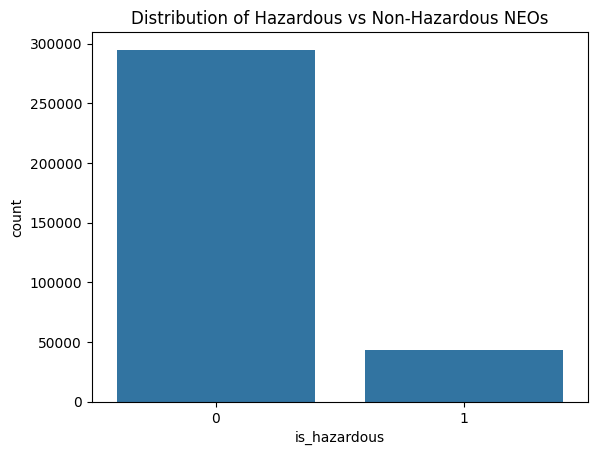

In [15]:
# Distribution of the target variable
sns.countplot(x="is_hazardous", data=df)
plt.title("Distribution of Hazardous vs Non-Hazardous NEOs")
plt.show()

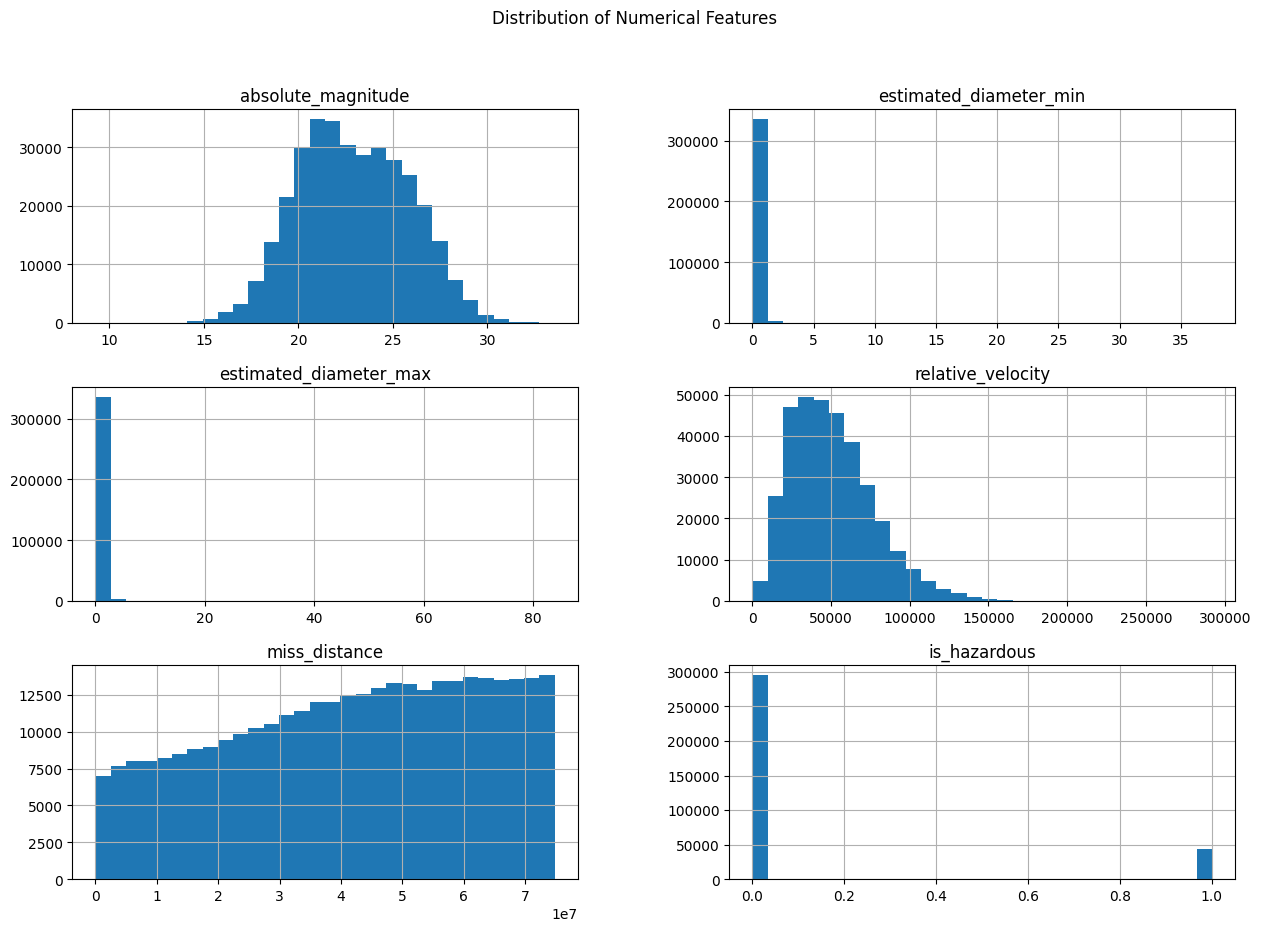

In [16]:
# Distribution of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

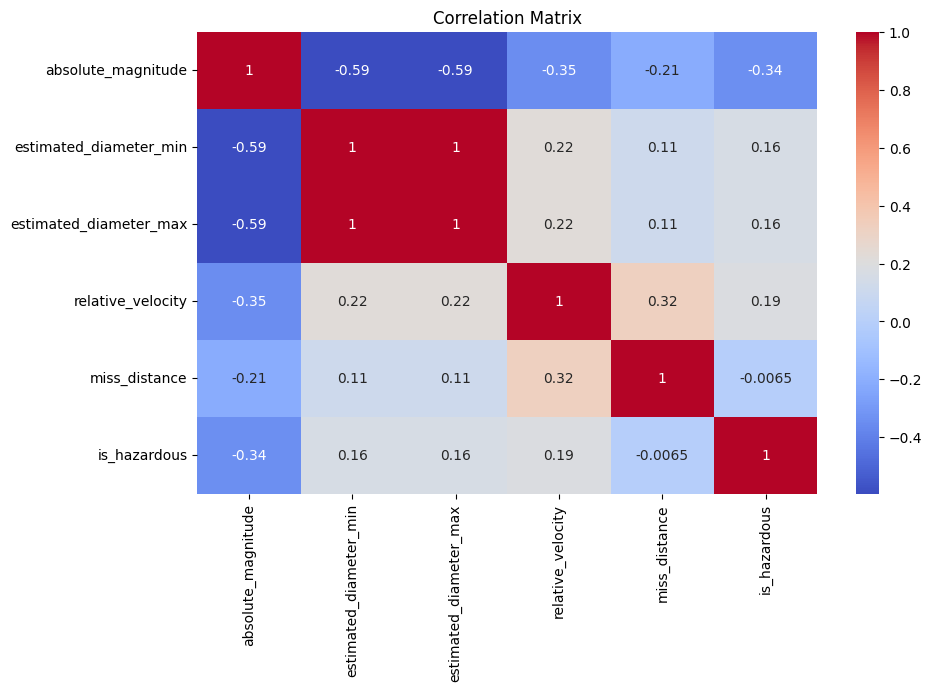

In [17]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 3. Data Preprocessing:
- Prepare the data for modeling by performing necessary preprocessing steps.
- This includes feature selection, encoding categorical variables, and normalizing or scaling numerical features where needed.
- Handling Imbalanced Classes:
 - The **"is_hazardous"** target column is likely imbalanced, with far fewer hazardous objects compared to non-hazardous ones.
- To address this, consider techniques such as:
 - Oversampling (e.g., SMOTE: Synthetic Minority Over-sampling Technique)
 - Undersampling
 - Class Weight Adjustment
 - Use of Balanced Accuracy as a Metric to ensure the model performs well on both classes.

In [18]:
# Separate features and target
X = df.drop(columns=["is_hazardous"])
y = df["is_hazardous"]

In [19]:
X.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07


In [20]:
y.head()

,is_hazardous
0,0
1,1
2,0
3,0
4,0


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (270536, 5)
X_test shape: (67635, 5)
y_train shape: (270536,)
y_test shape: (67635,)


In [22]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (270536, 5)
X_test_scaled shape: (67635, 5)


In [23]:
display(X_train.head())
print(X_train_scaled[:5])

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
108946,18.70,0.483676,1.081534,128822.404674,6.220195e+07
25572,22.75,0.074913,0.167510,38706.719006,1.733822e+07
307001,26.86,0.011286,0.025237,29243.381534,4.811080e+07
11765,22.21,0.096063,0.214803,74013.386113,7.085015e+07
207306,25.50,0.021113,0.047211,38289.320174,4.391704e+07


[[-1.45404797  1.00029444  1.00029444  2.94828885  0.99407991]
 [-0.0623231  -0.25558438 -0.25558438 -0.46849131 -1.16590105]
 [ 1.35001992 -0.45106847 -0.45106847 -0.82729836  0.3156564 ]
 [-0.24788641 -0.19060312 -0.19060312  0.87017819  1.41045095]
 [ 0.88267528 -0.42087662 -0.42087662 -0.48431719  0.11374613]]


In [24]:
display(X_test.head())
print(X_test_scaled[:5])

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
313083,26.00,0.016771,0.037501,20674.605109,8.875338e+06
229327,26.40,0.013949,0.031192,83322.237180,5.784726e+07
147689,25.31,0.023044,0.051528,16497.682909,2.584028e+07
162245,31.46,0.001357,0.003034,64667.069702,5.028880e+06
115618,23.65,0.049494,0.110673,15618.336289,4.815892e+07


[[ 1.05449316 -0.43421812 -0.43421812 -1.1521877  -1.57334976]
 [ 1.19194747 -0.44288674 -0.44288674  1.22312782  0.78442177]
 [ 0.81738448 -0.41494507 -0.41494507 -1.31055774 -0.75656648]
 [ 2.93074447 -0.48157559 -0.48157559  0.51580805 -1.75853888]
 [ 0.2469491  -0.33367924 -0.33367924 -1.3438986   0.31797307]]


In [25]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [26]:
smote

SMOTE(random_state=42)

In [27]:
X_train_resampled

array([[-1.45404797,  1.00029444,  1.00029444,  2.94828885,  0.99407991],
       [-0.0623231 , -0.25558438, -0.25558438, -0.46849131, -1.16590105],
       [ 1.35001992, -0.45106847, -0.45106847, -0.82729836,  0.3156564 ],
       ...,
       [-1.17003103,  0.52987977,  0.52987977,  1.35582123,  1.07960313],
       [-0.91446618,  0.23592784,  0.23592784,  1.46790682, -0.76595789],
       [-0.78072583,  0.11702279,  0.11702279,  0.07343211,  0.8156806 ]])

In [28]:
y_train_resampled

,is_hazardous
0,1
1,0
2,0
3,0
4,0
...,...
471837,1
471838,1
471839,1
471840,1


# 4. Model Training and Evaluation:
- Train one or more machine learning models using the preprocessed data.
- Evaluate the performance of your models using appropriate metrics such as Precision, Recall, F1-Score, and AUC-ROC Curve.
- Make sure to select the best-performing model based on these metrics.

In [50]:
# Define a function to evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    print(f"Classification Report of {name}:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix of {name}:\n")#, confusion_matrix(y_test, y_pred))
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba)  # Explicitly define roc_auc
    print(f"ROC-AUC Score of {name}:", roc_auc)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

    return roc_auc

Evaluating Logistic Regression: ...
Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.71      0.82     59088
           1       0.31      0.88      0.46      8547

    accuracy                           0.74     67635
   macro avg       0.64      0.80      0.64     67635
weighted avg       0.89      0.74      0.78     67635

Confusion Matrix of Logistic Regression:



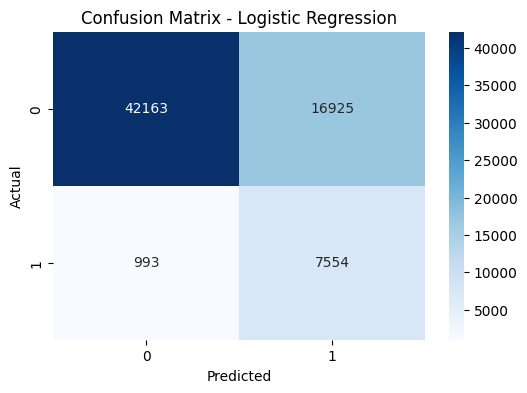

ROC-AUC Score of Logistic Regression: 0.8342968002289692


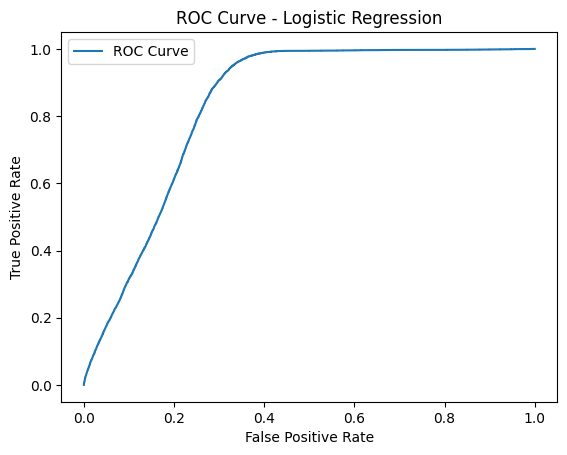

Evaluating Random Forest: ...
Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     59088
           1       0.63      0.69      0.66      8547

    accuracy                           0.91     67635
   macro avg       0.79      0.82      0.80     67635
weighted avg       0.91      0.91      0.91     67635

Confusion Matrix of Random Forest:



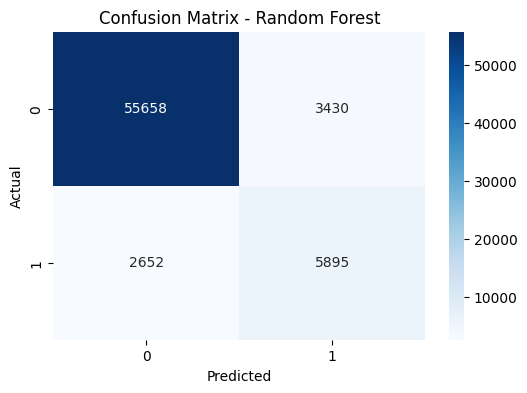

ROC-AUC Score of Random Forest: 0.9466584560258404


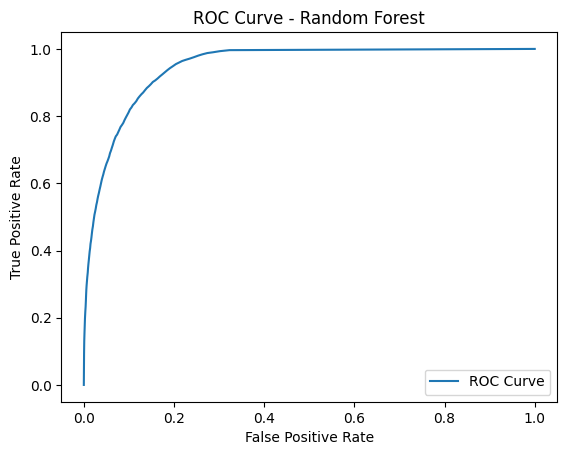

Evaluating XGBoost: ...
Classification Report of XGBoost:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85     59088
           1       0.35      0.93      0.51      8547

    accuracy                           0.77     67635
   macro avg       0.67      0.84      0.68     67635
weighted avg       0.91      0.77      0.81     67635

Confusion Matrix of XGBoost:



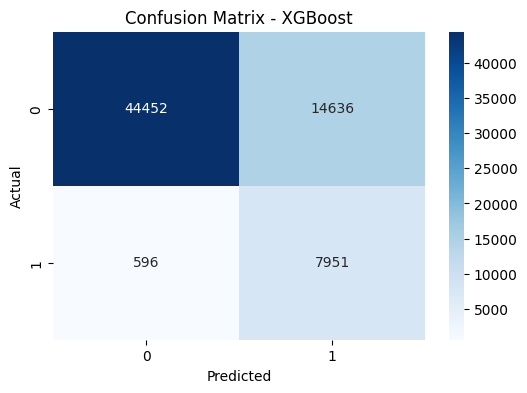

ROC-AUC Score of XGBoost: 0.9045356249357062


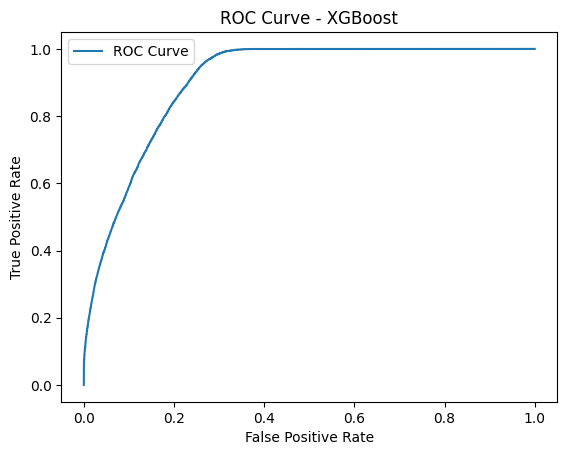

In [51]:
# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    print(f"Evaluating {name}: ...")
    roc_auc = evaluate_model(name, model, X_train_resampled, y_train_resampled, X_test_scaled, y_test)
    results[name] = {"ROC-AUC": roc_auc}

In [52]:
# Save the Best Model
best_model = max(results, key=lambda k: results[k]['ROC-AUC'])
joblib.dump(models[best_model], f'{best_model}.pkl')

print(f"\nBest Model Saved: {best_model}")
print("Model training and evaluation completed!")


Best Model Saved: Random Forest
Model training and evaluation completed!


In [36]:
# # Define a function to evaluate models
# def evaluate_model(model, X_train, y_train, X_test, y_test):
#     # Train the model
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)
#     y_pred_proba = model.predict_proba(X_test)[:, 1]

#     # Evaluate the model
#     print("Classification Report:\n", classification_report(y_test, y_pred))
#     print("Confusion Matrix:\n")#, confusion_matrix(y_test, y_pred))
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
#     plt.title(f"Confusion Matrix")
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.show()

#     # Calculate ROC-AUC score
#     roc_auc = roc_auc_score(y_test, y_pred_proba)  # Explicitly define roc_auc
#     print("ROC-AUC Score:", roc_auc)

#     # Plot ROC Curve
#     fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#     plt.plot(fpr, tpr, label="ROC Curve")
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title("ROC Curve")
#     plt.legend()
#     plt.show()

#     return roc_auc

Evaluating Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.71      0.82     59088
           1       0.31      0.88      0.46      8547

    accuracy                           0.74     67635
   macro avg       0.64      0.80      0.64     67635
weighted avg       0.89      0.74      0.78     67635

Confusion Matrix:



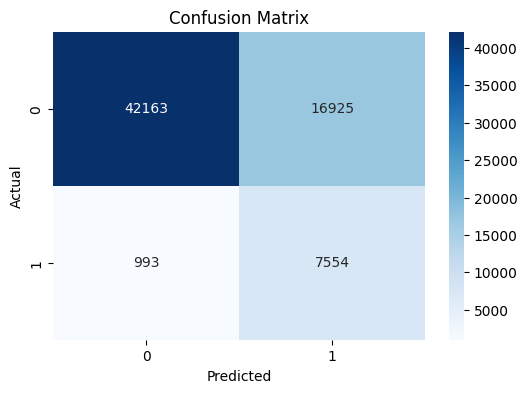

ROC-AUC Score: 0.8342968002289692


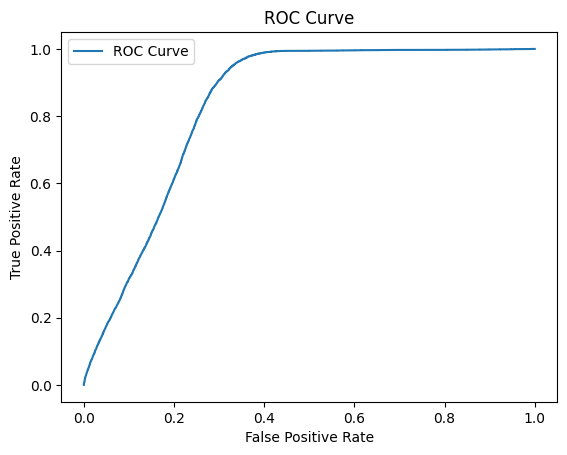

Evaluating Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     59088
           1       0.63      0.69      0.66      8547

    accuracy                           0.91     67635
   macro avg       0.79      0.82      0.80     67635
weighted avg       0.91      0.91      0.91     67635

Confusion Matrix:



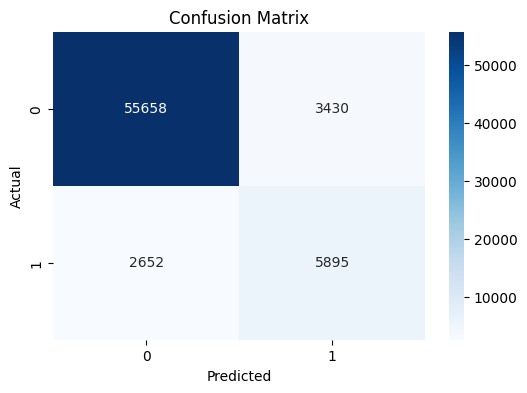

ROC-AUC Score: 0.9466584560258404


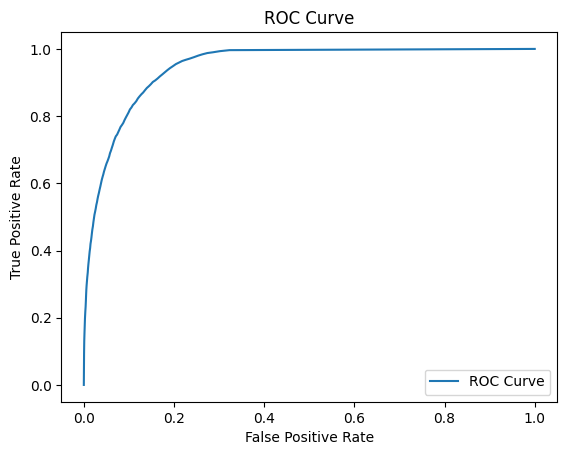

Evaluating XGBoost:
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85     59088
           1       0.35      0.93      0.51      8547

    accuracy                           0.77     67635
   macro avg       0.67      0.84      0.68     67635
weighted avg       0.91      0.77      0.81     67635

Confusion Matrix:



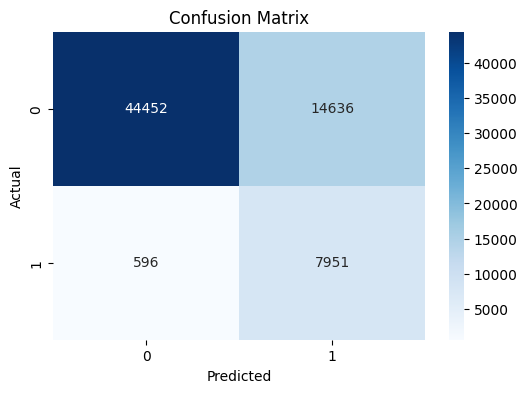

ROC-AUC Score: 0.9045356249357062


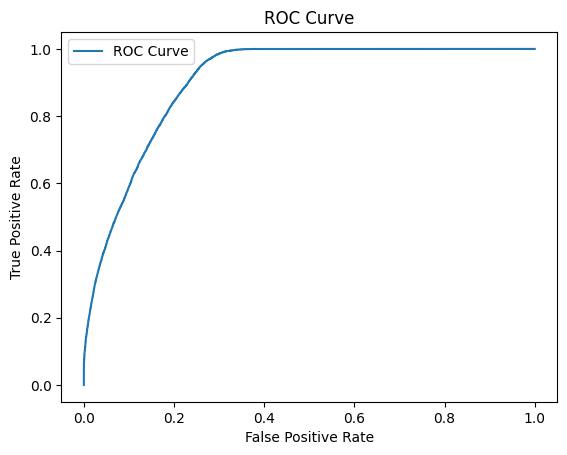

In [37]:
# # Train and evaluate models
# models = {
#     "Logistic Regression": LogisticRegression(random_state=42),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "XGBoost": XGBClassifier(random_state=42)
# }

# results = {}
# for name, model in models.items():
#     print(f"Evaluating {name}:")
#     roc_auc = evaluate_model(model, X_train_resampled, y_train_resampled, X_test_scaled, y_test)
#     results[name] = {"ROC-AUC": roc_auc}

In [38]:
# # Save the Best Model
# best_model = max(results, key=lambda k: results[k]['ROC-AUC'])
# joblib.dump(models[best_model], 'best_model.pkl')

# print(f"\nBest Model Saved: {best_model}")
# print("Model training and evaluation completed!")


Best Model Saved: Random Forest
Model training and evaluation completed!


In [39]:
# # Train and evaluate a Logistic Regression model
# print("Logistic Regression:")
# log_reg = LogisticRegression(random_state=42)
# evaluate_model(log_reg, X_train_resampled, y_train_resampled, X_test_scaled, y_test)

# # Train and evaluate a Random Forest model
# print("Random Forest:")
# rf = RandomForestClassifier(random_state=42)
# evaluate_model(rf, X_train_resampled, y_train_resampled, X_test_scaled, y_test)

# # Train and evaluate an XGBoost model
# print("XGBoost:")
# xgb = XGBClassifier(random_state=42)
# evaluate_model(xgb, X_train_resampled, y_train_resampled, X_test_scaled, y_test)

In [40]:
# # Hyperparameter Tuning (Example for Random Forest)
# param_grid = {
#     "n_estimators": [100, 200],
#     "max_depth": [None, 10, 20],
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [1, 2]
# }

# grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="roc_auc")
# grid_search.fit(X_train_resampled, y_train_resampled)

# print("Best Parameters:", grid_search.best_params_)
# print("Best ROC-AUC Score:", grid_search.best_score_)

# # Train the final model with the best parameters
# best_rf = grid_search.best_estimator_
# evaluate_model(best_rf, X_train_resampled, y_train_resampled, X_test_scaled, y_test)